# Hello, [NumPy](https://numpy.org/doc/stable/reference/)!

## What is numpy?

- (in short) The core library for scientific computing in Python.
- (according to the official website) "NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more."

**Why use numpy?**

- Very fast!
- Has a lot of built-in mathematical operations with arrays.
- Most of its code is written in C.
- Core library for pandas, matplotlib, sklearn!

**What are some usecases?**
- array/matrix operations (linear algebra) (dot product, cross product, inverse of a matrix, determinant of a matrix, eigenvectors, etc)
- random numbers
- working with images <- They are often represented as a 3-dimensional matrix with RGB values.

## Array basics

**Axis**: Number of dimensions.

**Shape**: Number of elements in each dimension.

1D array:

![1d_array](https://raw.githubusercontent.com/SimeonHristov99/ML_21-22/main/Week_02%20-%20Hello%2C%20Numpy!/assets/1d.png)

2D array:

![2d_array](https://raw.githubusercontent.com/SimeonHristov99/ML_21-22/main/Week_02%20-%20Hello%2C%20Numpy!/assets/2d.png)

3D array:

![3D array](https://raw.githubusercontent.com/SimeonHristov99/ML_21-22/main/Week_02%20-%20Hello%2C%20Numpy!/assets/3d.png)

In [2]:
import numpy as np

In [ ]:
# Check the version of numpy
np.__version__

'1.21.5'

In [ ]:
# Create a numpy from the list [7, 2, 9, 10]
# Note: Arrays are homogeneours. They can't hold multiple types
a = np.array([7, 2, 9, 10])

# Print it
a

array([ 7,  2,  9, 10])

In [ ]:
# Check "the shape" of the array, i.e. how many elements are in each dimension
a.shape

(4,)

In [ ]:
# See what datatype is held in the array
a.dtype

dtype('int64')

In [ ]:
# Check how many dimensions are in the array
a.ndim

1

In [ ]:
# Get the total number of elements in the array
# This is the same as if you multiply the values of the shape
print(a.size)
print(a.shape[0])

4
4


In [ ]:
# Get the number of elements along the first dimension
len(a)

4

In [ ]:
a.itemsize # returns how much memory each element takes (in bytes)
# Each element is 64 bits (seen from `a.dtype`),
# so we get 8 bytes (= 64 bits) (1 byte = 8 bits)

8

In [ ]:
# Indexing works like in lists.
a[0]

7

In [ ]:
# Assigning values also works like in lists, i.e. arrays are mutable by default
a[0] = 10
a

array([10,  2,  9, 10])

Mathematical operations (sum, dot product, cross product, etc) work **ELEMENTWISE**.

In [ ]:
b = a * np.array([2, 0, 0, 2])
b

array([20,  0,  0, 20])

In [ ]:
b = a * 2
b

array([20,  4, 18, 20])

## Array vs. List

### Visual difference

In [ ]:
l = [1, 2, 3]
a = np.array([1, 2, 3])

print(l)
print(a)

[1, 2, 3]
[1 2 3]


### Appending elements

You can append elements to lists

In [ ]:
l.append(4)
l

[1, 2, 3, 4]

But you **CANNOT APPEND** elements to an array

In [ ]:
# a.append(4)

In order to add an element a new array has to be created (using **np.append**) which is the concatenation of the old one and the new values.

In [ ]:
np.append(a, 4)

array([1, 2, 3, 4])

In [ ]:
a

array([1, 2, 3])

In [ ]:
# Python lists and Python tuples are array-like objects for numpy.
print(np.append(a, [4, 7]))
print(np.append(a, np.array([4, 7])))
print(np.append(a, (4, 7)))

[1 2 3 4 7]
[1 2 3 4 7]
[1 2 3 4 7]


### Adding a number to all elements

In [ ]:
# It can't be done without some kind of iteration (map, loop, LC)
# l + 4 # This won't even be accepted by the compiler
l + [4] # This will append a 4

[1, 2, 3, 4, 4]

In [ ]:
l

[1, 2, 3, 4]

In [ ]:
a

array([1, 2, 3])

In [ ]:
a + 4 # <- Broadcasting!
# Under the hood it is actually `a + np.array([4, 4, 4])`

array([5, 6, 7])

In [ ]:
l * 2

[1, 2, 3, 4, 1, 2, 3, 4]

In [ ]:
a * 2

array([2, 4, 6])

In [ ]:
a * np.array([2, 3, 8])

array([ 2,  6, 24])

In [ ]:
# Remember that mathematical operations work elementwise!
np.sqrt(a)

array([1.        , 1.41421356, 1.73205081])

In [ ]:
# Natural logarithm.
np.log(a)

array([0.        , 0.69314718, 1.09861229])

## Dot product

In [ ]:
l1 = [1, 2, 3]
l2 = [4, 5, 6]

sum([ x * y for x, y in zip(l1, l2) ]) # Should be 32.

32

In [ ]:
a1 = np.array(l1)
a2 = np.array(l2)

print(np.dot(a1, a2))
print(np.sum(a1*a2))
print((a1*a2).sum())
print(a1 @ a2)

32
32
32
32


## Speed Test: Iterating over Python lists vs. Using np.array() operations.

In [ ]:
from timeit import default_timer as timer

number_of_elements = 10000
number_of_calls = 1000

py_list = list(range(number_of_elements))
np_arr = np.array(py_list)

def add2_list():
  return [ i + 2 for i in py_list ]

def add2_np():
  return np_arr + 2

In [ ]:
start = timer()

for _ in range(number_of_calls):
  add2_list()

end = timer()

time_python = end - start
time_python

0.6045484380001653

In [ ]:
start = timer()

for _ in range(number_of_calls):
  add2_np()

end = timer()

time_np = end - start
time_np

0.00758357100039575

In [ ]:
# numpy operations are 80+ times faster than list operations
time_python / time_np

79.7181747185616

## Multidimensional arrays (nd-array)

In [ ]:
# Let's create one
a = np.array([[5.2, 3, 4.5], [9.1, 0.1, 0.3]])

# Print it
a

array([[5.2, 3. , 4.5],
       [9.1, 0.1, 0.3]])

In [ ]:
# Check its shape
a.shape

(2, 3)

## Array indexing / slicing / boolean indexing

In [ ]:
# Get the elements on the first row
print(a[0])

# We can omit the `:` when it's the last `argument` of the slice
print(a[0, :])

[5.2 3.  4.5]
[5.2 3.  4.5]


In [ ]:
# Get the left-most element
print(a[0][0])
print(a[0, 0])

5.2
5.2


In [ ]:
# Get the first element from all rows
a[:, 0]

array([5.2, 9.1])

In [ ]:
# Transposing an array
a.T

array([[5.2, 9.1],
       [3. , 0.1],
       [4.5, 0.3]])

In [ ]:
a

array([[5.2, 3. , 4.5],
       [9.1, 0.1, 0.3]])

In [ ]:
# Get the elements along the diagonal.
el_on_diag = np.diag(a)
# Note: a 1D array is returned
el_on_diag

array([5.2, 0.1])

In [ ]:
# If you pass a 1D vector to np.diag, it creates a square matrix with those elements on the diagonal and 0s everywhere else.
np.diag(el_on_diag)

array([[5.2, 0. ],
       [0. , 0.1]])

In [ ]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
a

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [ ]:
# How to get only 6 and 7?
a[1, 1:3]

array([6, 7])

In [ ]:
# How to get 8?
print(a[1, -1])
print(a[-1, -1])

8
8


In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]])
a, a.shape

(array([[1, 2],
        [3, 4],
        [5, 6]]), (3, 2))

In [ ]:
# Check whether the values are greater than 2
a > 2

array([[False, False],
       [ True,  True],
       [ True,  True]])

In [ ]:
# Get the values greater than 2
# Note: The return value is 1D
a[a > 2]

array([3, 4, 5, 6])

In [ ]:
# Flatten an array in three ways
print(a.ravel())
print(a.flatten())
print(a.reshape(-1))

[1 2 3 4 5 6]
[1 2 3 4 5 6]
[1 2 3 4 5 6]


In [ ]:
# Index using another array or list
a = a.reshape(-1)
b = [1, 3, 5]
a[b]

array([2, 4, 6])

In [ ]:
# Note a[1, 3, 5] will not work, because we don't have enough dimensions
# It will assume that we're getting the
# element at idx 1 from the first dimension
# from it the element at idx 3 from the second dimension, etc 
a[[1, 3, 5]]

array([2, 4, 6])

In [ ]:
# Substitute the values less than or equal to 2 with -1.
# Analogous to the ternary operator.
np.where(a <= 2, -1, a)

array([-1, -1,  3,  4,  5,  6])

In [ ]:
a[a <= 2] = -1
a

array([-1, -1,  3,  4,  5,  6])

## Reshape

In [ ]:
# Generate an array with consecutive elements
a = np.arange(1, 7)
a, a.shape

(array([1, 2, 3, 4, 5, 6]), (6,))

In [ ]:
np.reshape(a, (2, 3))

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
a.reshape((2, 3))

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
# Note: The product of the new shapes must equal the initial shape!
# a.reshape((5, 6))

In [ ]:
# numpy can guess a shape
# Note: Use -1 only for one dimension
np.reshape(a, (2, -1))

array([[1, 2, 3],
       [4, 5, 6]])

### Create a new dimension

In [ ]:
a, a.shape

(array([1, 2, 3, 4, 5, 6]), (6,))

In [ ]:
a

array([1, 2, 3, 4, 5, 6])

In [ ]:
# Add a new dimension on the left
a = a[np.newaxis, ...]
a

array([[1, 2, 3, 4, 5, 6]])

In [ ]:
# Check the shape
a.shape

(1, 6)

In [ ]:
# Add a new dimension on the right
a = a[..., np.newaxis]
a

array([[[1],
        [2],
        [3],
        [4],
        [5],
        [6]]])

In [ ]:
# Check the shape
a.shape

(1, 6, 1)

## Concatenation

In [ ]:
a = np.reshape(np.arange(1, 5), (2, 2))
a

array([[1, 2],
       [3, 4]])

In [ ]:
b = np.array([[5, 6]])
b

array([[5, 6]])

In [ ]:
# Concatenate along axis=0
print(np.concatenate((a, b)))
print(np.concatenate((a, b), axis=0))

[[1 2]
 [3 4]
 [5 6]]
[[1 2]
 [3 4]
 [5 6]]


In [ ]:
# Axes must match exactly!
# print(np.concatenate((a, b), axis=1))

In [ ]:
# In order to add the new elements as a column, we must transpose
c = np.concatenate((a, b.T), axis=1)
c

array([[1, 2, 5],
       [3, 4, 6]])

In [ ]:
# You can flatten the result
c.reshape(-1)

array([1, 2, 5, 3, 4, 6])

**hstack**: Add a new column

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])

np.hstack((a, b))

array([1, 2, 3, 4, 5, 6, 7, 8])

**vstack**: Add a new row

In [ ]:
np.vstack((a, b))

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

## Broadcasting

- a mechanism that allows numpy to work with arrays of different shapes

In [ ]:
x = np.array([[1, 2, 3], [4, 5, 6], [1, 2, 3], [4, 5, 6]])
a = np.array([1, 0, 1])

print(x)
print(a)

[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]
[1 0 1]


In [ ]:
x.shape

(4, 3)

In [ ]:
a.shape

(3,)

In [ ]:
# Technically, we should have the same shape on both arrays, but numpy can automatically create it for us.
x + a

array([[2, 2, 4],
       [5, 5, 7],
       [2, 2, 4],
       [5, 5, 7]])

## Data Science Functions and Axes

In [ ]:
a = np.reshape(np.arange(7, 25), (2, -1))
a

array([[ 7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24]])

In [ ]:
# Get the sum of all elements
print(np.sum(a))
print(np.sum(a, axis=None))
print(a.sum())
print(a.sum(axis=None))

279
279
279
279


In [ ]:
print(np.sum(a, axis=0)) # Squish the rows (first dim)
print(np.sum(a, axis=1)) # Squish the cols (second dim)
print(np.sum(a, axis=-1)) # Squish the last dimension (in this case the cols)

[23 25 27 29 31 33 35 37 39]
[ 99 180]
[ 99 180]


In [ ]:
print(np.mean(a, axis=None))
print(np.mean(a, axis=0))
print(np.mean(a, axis=1))

15.5
[11.5 12.5 13.5 14.5 15.5 16.5 17.5 18.5 19.5]
[11. 20.]


In [ ]:
print(np.var(a, axis=None))
print(np.var(a, axis=0))
print(np.var(a, axis=1))

26.916666666666668
[20.25 20.25 20.25 20.25 20.25 20.25 20.25 20.25 20.25]
[6.66666667 6.66666667]


In [ ]:
print(np.std(a, axis=None))
print(np.std(a, axis=0))
print(np.std(a, axis=1))

5.188127472091127
[4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5]
[2.5819889 2.5819889]


In [ ]:
print(np.min(a))
print(np.min(a, axis=0))
print(np.min(a, axis=1))

7
[ 7  8  9 10 11 12 13 14 15]
[ 7 16]


In [ ]:
print(np.max(a, axis=None))
print(np.max(a, axis=0))
print(np.max(a, axis=1))

24
[16 17 18 19 20 21 22 23 24]
[15 24]


## Datatypes

In [ ]:
x = np.array([1, 2])
x

array([1, 2])

In [ ]:
# If no `.` are used, the elements in the array get allocated as 64 bit intergers.
x.dtype

dtype('int64')

In [ ]:
x = np.array([1., 2])
x

array([1., 2.])

In [ ]:
# If at least one `.` is used, the elements in the array get allocated as 64 bit floats.
x.dtype

dtype('float64')

In [ ]:
# We can also enforce the type
x = np.array([1., 2], dtype=np.int32)
x

array([1, 2], dtype=int32)

In [ ]:
x = np.array([1, 2], dtype=np.float32)
x

array([1., 2.], dtype=float32)

## Copying

In [ ]:
# Using `=` only results in copying by reference.
a = np.array([1, 2, 3])
b = a
b[0] = 42

print(f'a={a}')
print(f'b={b}')

a=[42  2  3]
b=[42  2  3]


In [ ]:
a = np.array([1, 2, 3])
# b = np.copy(a)
b = a.copy() # same as `a.copy()`
b[0] = 42

print(f'a={a}')
print(f'b={b}')

a=[1 2 3]
b=[42  2  3]


## Generating arrays

In [ ]:
# Generate zeros in a specified shape
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
np.zeros((2, 3), dtype=np.int32)

array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)

In [ ]:
# Same but for ones
a = np.ones((2, 3))
a

array([[1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
# Note: The default value type is float!
a.dtype

dtype('float64')

In [ ]:
# If you want to have an array of elements all with a certain value, use `np.full()`:
np.full((2, 3), 42, dtype=np.float32)

array([[42., 42., 42.],
       [42., 42., 42.]], dtype=float32)

In [ ]:
# Generate the identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
np.arange(5, 101)

array([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100])

In [ ]:
# Get an array of equally spaced numbers
np.linspace(0, 10, 5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

## Random numbers

In [ ]:
# Sample numbers from the uniform distribution between 0 and 1.
np.random.random((5, 2))

array([[0.55170886, 0.36744799],
       [0.14491221, 0.7833791 ],
       [0.34117847, 0.20446458],
       [0.20330215, 0.78932258],
       [0.99397061, 0.96693583]])

In [ ]:
a = np.random.random(10000)
print(np.mean(a)) # Mean is (a+b) / 2
print(np.var(a)) # Variance is (b-a)^2 / 12
print(1/12)

0.4995239586336188
0.08262813587873413
0.08333333333333333


In [ ]:
# Sample numbers from the standard normal distribution.
np.random.randn(5)

array([ 0.33085627,  0.3921214 , -0.41096262, -0.31086236, -0.67623644])

In [ ]:
# Note: Each dimension has be a separate argument!
# a = np.random.randn((5, 2)) # Will not work, because dimensions are a tuple.
a = np.random.randn(10).reshape((5, 2))
a

array([[-0.87883487, -0.33558881],
       [ 1.42692404,  0.383609  ],
       [-0.6685725 ,  0.72681509],
       [-0.91004897,  1.4862225 ],
       [ 1.63329621,  0.44020223]])

In [ ]:
np.random.randn(5, 2)

array([[ 1.22359584, -0.32824495],
       [-0.2691076 , -0.05365897],
       [-0.77556713, -0.00804016],
       [ 1.15047101, -0.38999238],
       [-1.17629154, -0.98887078]])

In [ ]:
a = np.random.randn(10000)
print(np.mean(a))
print(np.var(a))

0.007875454258887665
1.001358346883476


In [ ]:
# Generate a random integer
# in the interval [0, 9]
print(np.random.randint(10))

# in the interval [3, 9]
print(np.random.randint(3, 10))

# 3x3 matrix with values from the interval [42, 68]
print(np.random.randint(41, 69, size=(3,3)))

2
8
[[66 65 57]
 [48 67 67]
 [52 50 58]]


In [ ]:
# Sample random elements from an array
# random elements with replacement from the interval [0, 4]
print(np.random.choice(5, size=10))

# random elements with replacement from an array
print(np.random.choice(a, size=10))

# random elements with replacement from a list
print(np.random.choice([1, 2, 3], size=10))

[3 4 4 1 4 3 1 0 0 1]
[-1.01401758  0.29479999 -0.12733891  1.0053528  -0.25651692 -2.72577909
 -0.42410709  0.83501539 -0.41025931 -0.59572304]
[3 1 2 3 2 2 3 3 3 3]


# Hello, Machine Learning!

Definition for **artificial intelligence**: Simulating human knowledge and decision making with computers.

![Map of AI](https://raw.githubusercontent.com/SimeonHristov99/ML_21-22/f9550c86a953a71695695a06e582b3fdc576b9b3/Week_01%20-%20Hello,%20Python!/assets/map_of_ai.png)

Definitions for **machine learning**:

*   The ability of machines to predict outcomes without being explicitly programmed to do so.
*   Creating algorithms that let machines receive data and use this data to:
    - make predictions
    - analyse patterns
    - give recommendations

![Map of AI](https://raw.githubusercontent.com/SimeonHristov99/ML_21-22/f9550c86a953a71695695a06e582b3fdc576b9b3/Week_01%20-%20Hello,%20Python!/assets/map_of_ml.png)

### **The three major types of Machine Learning Problems**


**Classification**: divide samples into predefined groups
- email classification (spam vs non-spam) (binary classification)
- animal classification (cat vs dog) (binary classification)
- digit classification (multiclass classification)

**Regression**: predict value of a given sample
- house price prediction
- likelihood of cancer
- stock prediction

**Clustering**: divide samples into groups (that are not predefined)
- customer segmentation
- anomaly detection

Every type of problem has samples that can be represented as a collection of **features**:

$$ sample1 = [feature1, feature2 .. featureN] $$
$$ sample2 = [feature1, feature2 .. featureN] $$
$$ sample3 = [feature1, feature2 .. featureN] $$
$$ ... $$
$$ sampleM = [feature1, feature2 .. featureN] $$

**features** = independent quantities that represent a characteristic of sample data

Example: **Predict House Price**

- Goal: \$300,000, \$400,000, \$401,000

- What kind of problem is this? Regression

- Characteristics of House that determine Prices? Size, Location

> "30 sq. House in NYC" -> [30 sq, NYC] -> [30, 100] (since all have to measure quantity)

> "50 sq. House in Kansas City" -> [50, 74.04]

- There are numerous features that can determine the price. It's up to us (and sometimes to the model) to figure out which are relevant and which not.

**Scaling values**

> [No. of Squares] -> [0 - 70]

> [zip code] -> [0 - 150]

They are on different scales. We want all features to be weighted equally

> **Problem**: Greater the variance, greater the importance.

Solution: feature scaling to bring the values to a common range. Often the range is:
- [0, 1] (x - xmin) / (xmax - xmin)
- [-1, 1] (standard normal distribution).

> [30, 100] -> [0.43, 0.67]

> [50, 74.04] -> [0.71, 0.49]

Perfect! Now we can send this data to a model!

### **The three major types of Machine Learning Algorithms**

**Supervised learning**: Making predictions using data with the outputs provided.
    
- Example: Is a given email "spam" or "ham"?
- There is an outcome we are trying to predict
- (input, correct output)

**Unsupervised learning**: Extracting structure from data.

- Example: Segment grocery store shoppers into clusters that exhibit similar behaviors
- There is no "right answer" (there are no outputs).
- (input, ?)

**Reinforcement / Semi-supervised learning**: Learning through trial and error.

- (input, some output, grade for this output)
- the model makes an action
- we tell it how `good` that action is
- main application is playing games

**Supervised Learning**

- Solves Classification and Regression problems
- in regression: labels are House Prices
- in classification: labels are categories (dogs, cats)


    here's a set of features for sample house 1. here's its price. learn it
    here's a set of features for sample house 2. here's its price. learn it
    here's a set of features for sample house 3. here's its price. learn it
    ...

After the model has seen for ex. 1000 samples, it should be able to predict (give a good estimate for) the price for an unseen house.

Possible algorithms: Logistic regression, Linear regression, KNN, Decision Trees, Random Forests, SVMs, Neural Networks, etc

The primary goal of supervised learning is to build a model that "generalizes", i.e. it accurately predicts the **future** rather than the **past**!

**Unsupervised Learning**

- Solves Clustering problems
- Categorize 1000 Articles by topic
- Hypothetical labels: sports, music, politics, ...
- features: frequency of every word (each constituting a feature)
  - each sample will hold how many times we've seen every word
- 1000 articles, 100,000 unique total words. Thus, 100,000 features

- in the ML world these vectors represent points in a high dimensional plane. The model plots them virtually and then groups points that are close to each other. They are considered to be of the same topic.

- Possible algorithms: Hierarchical Clustering, K-means, PCA, etc

## Questions about Machine Learning

- How do I choose **which attributes** of my data to include in the model?
- How do I choose **which model** to use?
- How do I **optimize** this model for best performance?
- How do I ensure that I'm building a model that will **generalize** to unseen data?
- Can I **estimate** how well my model is likely to perform on unseen data?

## Topics which you can explore in case you want to dive deeper

### 1.   How AI is connected to business

![ai_business](https://raw.githubusercontent.com/SimeonHristov99/ML_21-22/main/Week_02%20-%20Hello%2C%20Numpy!/assets/context_of_ai.png)

### 2.   ML can be regarded as part of another field - Data Science

![ds_ml](https://raw.githubusercontent.com/SimeonHristov99/ML_21-22/main/Week_02%20-%20Hello%2C%20Numpy!/assets/context_ml_ds.png)

# Coding the building block of neural networks - the Perceptron!

![neuron](https://raw.githubusercontent.com/SimeonHristov99/ML_21-22/main/Week_02%20-%20Hello%2C%20Numpy!/assets/neuron.png)

What's the purpose of weights and biases? Let's check it out with a concrete example [in Desmos](https://www.desmos.com/calculator).

In [ ]:
# Model 1 neuron with 3 weights.
inputs = [1.2, 5.1, 2.1]
weights = [3.1, 2.1, 8.7]
bias = 3

In [ ]:
output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
output

35.7

![3 neurons](https://raw.githubusercontent.com/SimeonHristov99/ML_21-22/main/Week_02%20-%20Hello%2C%20Numpy!/assets/3neurons.png)

In [ ]:
# Model 3 neurons with 4 weights.
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

In [ ]:
output = [
        inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + bias,
        inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + bias,
        inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + bias,
]
output

[3.3, 2.46, 2.71]

How would you change the output?
  - can you change the input values? No
  - can you change the weight values? Yes
  - can you change the bias values? Yes

Optimize (more of a convenience for programmer, but still slow)

In [ ]:
weights = [
 [0.2, 0.8, -0.5, 1.0],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]
]

biases = [2, 3, 0.5]

In [ ]:
layer_outputs = [] # output of current layer of neurons

for ws, b in zip(weights, biases):
  neuron_output = 0 # output of a given neuron

  for inp, w in zip(inputs, ws):
    neuron_output += (inp * w)

  neuron_output += b
  layer_outputs.append(neuron_output)

layer_outputs

[4.8, 1.21, 2.385]

Really optimize (convenience for programmer and fast)

In [ ]:
inputs = np.array([1, 2, 3, 2.5])
weights = np.array([
 [0.2, 0.8, -0.5, 1.0],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]
])
biases = np.array([2, 3, 0.5])

In [ ]:
np.dot(weights, inputs) + bias

array([5.8  , 1.21 , 4.885])

![perceptron](https://raw.githubusercontent.com/SimeonHristov99/ML_21-22/c85ba2003e0058f86104de1d13233a4f0f322b4a/Week_02%20-%20Hello%2C%20Numpy!/assets/perceptron.svg)

# For Home

## Part 1: NumPy exercises

In [ ]:
# 1. Create a vector of 10 zeros but the fifth value of which is 1
a = np.zeros(10)
a[4] = 1
a

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [13]:
# 2. Create a vector with values ranging from 10 to 49 
np.arange(10, 50,)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

In [ ]:
# 3. Reverse an array in TWO ways:
# using `the Python way`
# and using a NumPy function
a = [1, 2, 3, 4]
print(a[::-1])
print(np.flip(a))

[4, 3, 2, 1]
[4 3 2 1]


In [12]:
# 4. Create a 3x3 matrix with the values from 0 to 8
a = np.arange(9,)
a.reshape((3, 3,))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
# 5. Find indices of non-zero elements from a = np.array([1,2,0,0,4,0])
# Output should be: array([0, 1, 4])
a = np.array([1,2,0,0,4,0])
a.nonzero()

(array([0, 1, 4]),)

In [ ]:
# 6. Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
# 7. Create a 3x3x3 array with random values drawn from the uniform distribution
np.random.random((3, 3, 3,))

array([[[0.77186176, 0.68991741, 0.00271579],
        [0.28360942, 0.60420027, 0.26372976],
        [0.72009643, 0.82171338, 0.99217543]],

       [[0.07190303, 0.667413  , 0.1867261 ],
        [0.29884121, 0.18125092, 0.25050779],
        [0.55541568, 0.27426732, 0.86225023]],

       [[0.25112681, 0.86670482, 0.2759248 ],
        [0.63006758, 0.33207636, 0.35438262],
        [0.4786721 , 0.09696697, 0.33004738]]])

In [4]:
# 8. Create a 10x10 array with random values and find the minimum and maximum values
# The distribution does not matter.
a = np.random.random((10, 10,))
print(a)
print(np.min(a))
print(np.max(a))

[[0.24519102 0.7172304  0.21386182 0.76639654 0.59082858 0.2863735
  0.92221344 0.88039776 0.06494283 0.32316453]
 [0.11101401 0.21793906 0.07595678 0.4302423  0.7284019  0.03268601
  0.55994246 0.6157714  0.92832743 0.26079845]
 [0.05075203 0.7333775  0.96571549 0.96561953 0.15050326 0.54616969
  0.30482732 0.14810213 0.41134462 0.89177518]
 [0.34469621 0.84893578 0.75415401 0.60260488 0.17127036 0.19039678
  0.71804518 0.06340387 0.76252121 0.10066981]
 [0.38470072 0.20276508 0.3878409  0.5505849  0.51766013 0.87212728
  0.51990499 0.42222    0.27057241 0.15003106]
 [0.08665299 0.25368711 0.86848329 0.31356234 0.49035581 0.83747223
  0.95400036 0.99931285 0.74439205 0.26269556]
 [0.82257433 0.86060136 0.03736444 0.18693587 0.74822951 0.20927649
  0.72534282 0.99218983 0.15293586 0.38981171]
 [0.37560164 0.93886381 0.91704772 0.28394606 0.5945812  0.3757553
  0.77171302 0.62565642 0.23750781 0.13115158]
 [0.10768465 0.64437498 0.73210312 0.5449259  0.5036881  0.86819275
  0.45489708 0

In [3]:
# 9. Create a random array of size 30 and find the mean value
a = np.random.random((30,))
print(a)
np.mean(a)

[0.49751525 0.41586886 0.92779714 0.95277945 0.15248533 0.9019038
 0.66164495 0.03136283 0.48366254 0.78773543 0.19713915 0.81380708
 0.77707744 0.89650291 0.57443536 0.75392704 0.66855274 0.66949509
 0.15399369 0.39768819 0.81780393 0.52853917 0.0289103  0.13802125
 0.15172346 0.08710085 0.57512084 0.18991575 0.02294374 0.53400027]


0.4929817940976793

In [ ]:
# 10. Create a 5x5 array with 1 on the border and 0 inside
a = np.ones((5, 5,))
a[1:-1,1:-1] = 0
a

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

In [5]:
# 11. Add a border filled with 0's on the two sides of an array.
# Result should be: array([0, 1, 2, 3, 0])
# Hint: np.pad
a = [1, 2, 3]
np.pad(a, (1, 1,), 'constant', constant_values=(0))

array([0, 1, 2, 3, 0])

In [ ]:
# 12. Create a 5x5 matrix with values 1,2,3,4 just below the diagonal
# Expected result:
# array([[0, 0, 0, 0, 0],
#        [1, 0, 0, 0, 0],
#        [0, 2, 0, 0, 0],
#        [0, 0, 3, 0, 0],
#        [0, 0, 0, 4, 0]])
# Hint: np.diag
np.diag([1, 2, 3, 4], k=-1)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

In [6]:
# 13. Create and multiply a 5x3 matrix by a 3x2 matrix (real matrix product)
# The matrices can hold random values or you can create them manually.
a = np.arange(10, 25,).reshape((5, 3,))
b = np.arange(2, 8,).reshape((3, 2,))
np.dot(a, b)

array([[136, 169],
       [172, 214],
       [208, 259],
       [244, 304],
       [280, 349]])

In [ ]:
# 14. Create a 1D array of random integers between 0 and 9
# negate all elements which are between 3 and 8.
a = np.arange(10)
np.where((a > 3) & (a < 8) , -a , a)

array([ 0,  1,  2,  3, -4, -5, -6, -7,  8,  9])

In [7]:
# 15. Create a random array of size 10 and sort it
np.sort(np.random.random(10,))

array([0.0033326 , 0.17300734, 0.18219138, 0.29408923, 0.40198801,
       0.4214717 , 0.62995354, 0.65727007, 0.91694854, 0.98106699])

In [9]:
# 16. Create random vector of size 10 and replace the maximum value by 0
a = np.random.rand((10))
np.where(a == np.max(a), 0 , a)

array([0.        , 0.02292698, 0.75739451, 0.32669521, 0.54521033,
       0.27416999, 0.80706011, 0.50407248, 0.42386127, 0.94647341])

## Part 2: KNN Implementation using efficient NumPy operations

In [ ]:
# Define the `KNN` class here
class KNN:
  def fit(self):
    pass

  def predict(self):
    pass

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

In [ ]:
X_train[:5]

array([[ -1.96601474,  -8.59689627],
       [  1.40959572,  -1.62390046],
       [ -0.75207647, -10.78902785],
       [ -0.53278301,  -1.64847081],
       [ -0.12118447,  -1.40749481]])

In [ ]:
y_train[:5]

array([0, 1, 0, 1, 1])

In [ ]:
knn = KNN(k=2)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print("Training classification accuracy", accuracy(y_train, knn.predict(X_train)))
print("Testing classification accuracy", accuracy(y_test, predictions))

Training classification accuracy 1.0
Testing classification accuracy 1.0


### Be patient - the following cell will take some time to run.

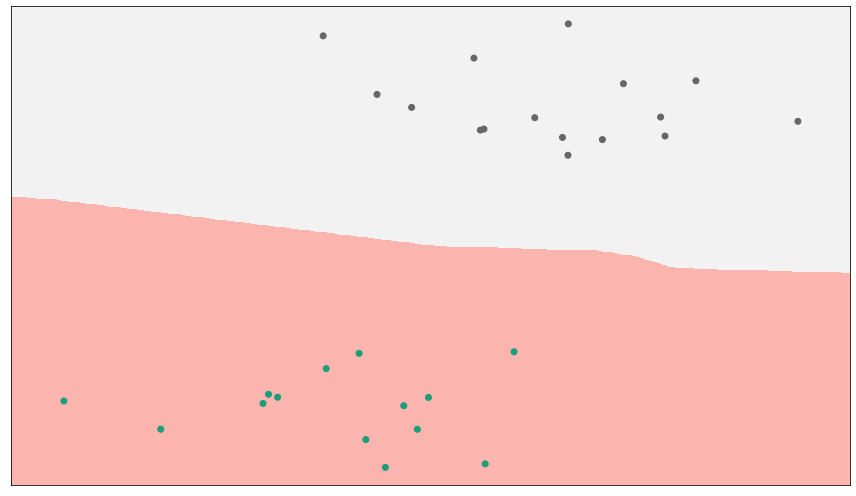

In [ ]:
h = .02 # step size in the mesh

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X_test[:,0].min() - .5, X_test[:,0].max() + .5
y_min, y_max = X_test[:,1].min() - .5, X_test[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

# Plot also the training points
plt.scatter(X_test[:,0], X_test[:,1],c=y_test, cmap=plt.cm.Dark2)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.tight_layout()